In [2]:
import librosa
import glob
import random

from librosa import display

import scipy as sp
import numpy as np

import matplotlib.pyplot as plt

import IPython.display as ipd

In [3]:
file_list = sorted(glob.glob('../resource/*.wav'))

In [39]:
file = random.choice(file_list)

print(file)

../resource/21. Yes or Yes (O-B).wav


In [55]:
sec = 5

fs = librosa.get_samplerate(file)

print('Sampling Rate: {}'.format(fs))

stream = librosa.core.stream(file, 1, sec * fs, sec * fs, mono=False)

# next(stream)

Sampling Rate: 16000


In [6]:
def spec2mel(img):
    return 20 * np.log(np.maximum(img, 1e-8))

In [ ]:
# data = next(stream)

# T, F, Sxx = sp.signal.stft(data, fs=16000, nperseg=400)

# Zxx = np.abs(Sxx)

# plt.figure()
# plt.imshow(spec2mel(Zxx[0]), origin='reversed', aspect='auto')
# plt.show()

# plt.figure()
# plt.imshow(spec2mel(Zxx[1]), origin='reversed', aspect='auto')
# plt.show()

# print(Sxx.shape)

In [68]:
data = next(stream)

In [69]:
ipd.Audio(data, rate=16000)

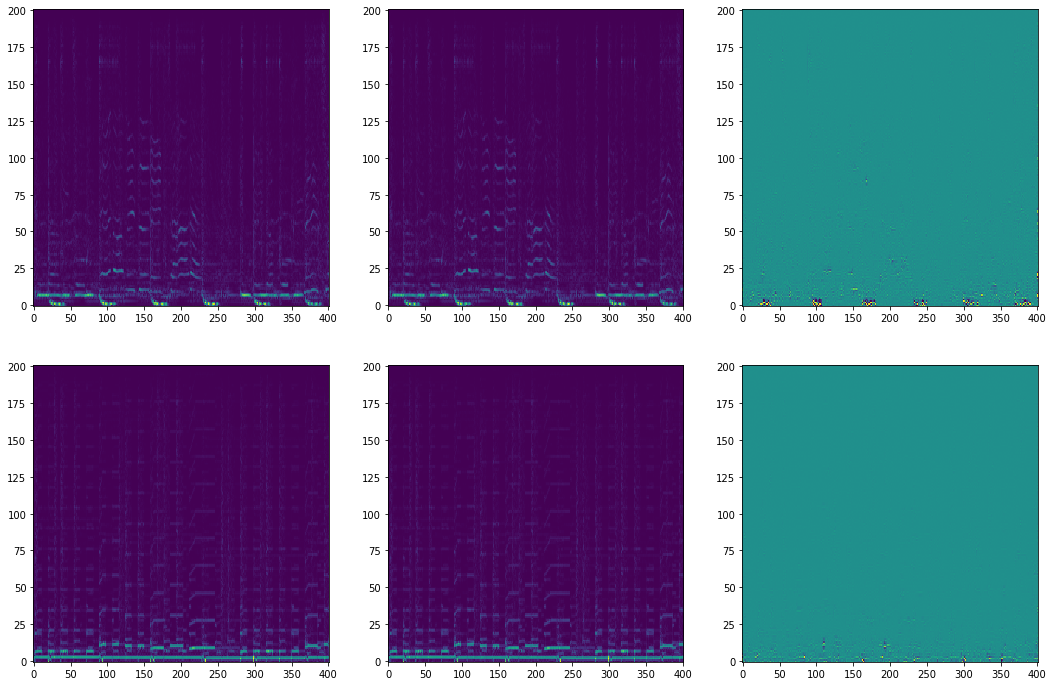

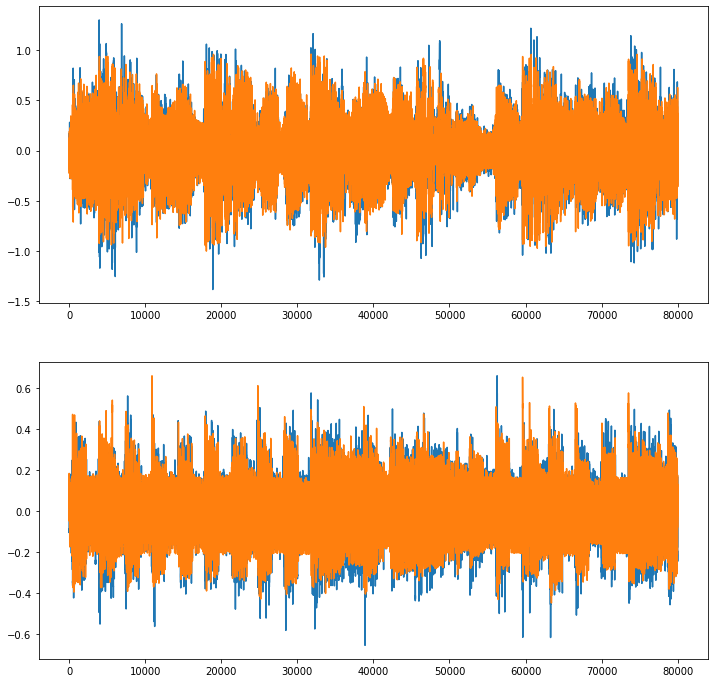

In [75]:
# data = next(stream)

y1 = np.copy(data[0, :])
y2 = np.copy(data[1, :])

T, F, Sxx = sp.signal.stft(data, fs=16000, nperseg=400)

Zxx = np.abs(Sxx)
Zxx_recon = np.zeros(Zxx.shape)

Zxx[0] = np.abs(librosa.stft(y1, n_fft=400, hop_length=200, win_length=400))
Zxx[1] = np.abs(librosa.stft(y2, n_fft=400, hop_length=200, win_length=400))

data_1 = librosa.core.griffinlim(Zxx[0], n_iter=64, win_length=400, hop_length=200)
data_2 = librosa.core.griffinlim(Zxx[1], n_iter=64, win_length=400, hop_length=200)

Zxx_recon[0] = np.abs(librosa.stft(data_1, n_fft=400, hop_length=200, win_length=400))
Zxx_recon[1] = np.abs(librosa.stft(data_2, n_fft=400, hop_length=200, win_length=400))

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes = axes.flatten()

axes[0].imshow(Zxx[0], aspect='auto', origin='reversed')
axes[1].imshow(Zxx_recon[0], aspect='auto', origin='reversed')
im = axes[2].imshow(Zxx[0] - Zxx_recon[0], aspect='auto', origin='reversed')
im.set_clim([-2, 2])


axes[3].imshow(Zxx[1], aspect='auto', origin='reversed')
axes[4].imshow(Zxx_recon[1], aspect='auto', origin='reversed')
im = axes[5].imshow(Zxx[1] - Zxx_recon[1], aspect='auto', origin='reversed')
im.set_clim([-2, 2])

plt.show()

## Highpass Filtering might help improving audio quality

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

axes = axes.flatten()

axes[0].plot(data_1)
axes[0].plot(y1)

axes[1].plot(data_2)
axes[1].plot(y2)

plt.show()

